In [1]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [8]:
image_gen.flow_from_directory('..\Model Files\data\\train')

Found 731 images belonging to 3 classes.


In [9]:
image_gen.flow_from_directory('..\Model Files\data\\test')

Found 164 images belonging to 3 classes.


In [10]:
# width,height,channels
image_shape = (150,150,3)


In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('..\Model Files\data\\train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 632 images belonging to 2 classes.


In [18]:
test_image_gen = image_gen.flow_from_directory('..\Model Files\data\\test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 140 images belonging to 2 classes.


In [19]:
train_image_gen.class_indices

{'neem': 0, 'tulsi': 1}

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 32s 214ms/step - loss: 0.6625 - acc: 0.6496 - val_loss: 0.8543 - val_acc: 0.6429
Epoch 2/100
150/150 [==============================] - 29s 195ms/step - loss: 0.6264 - acc: 0.6537 - val_loss: 0.5543 - val_acc: 0.6429
Epoch 3/100
150/150 [==============================] - 31s 208ms/step - loss: 0.5783 - acc: 0.6950 - val_loss: 0.5706 - val_acc: 0.6857
Epoch 4/100
150/150 [==============================] - 29s 196ms/step - loss: 0.5661 - acc: 0.7271 - val_loss: 0.4603 - val_acc: 0.7714
Epoch 5/100
150/150 [==============================] - 30s 197ms/step - loss: 0.5262 - acc: 0.7462 - val_loss: 0.5047 - val_acc: 0.7643
Epoch 6/100
150/150 [==============================] - 35s 234ms/step - loss: 0.5042 - acc: 0.7587 - val_loss: 0.6202 - val_acc: 0.7643
Epoch 7/100
150/150 [==============================] - 35s 237ms/step - loss: 0.4846 - acc: 0.7671 - val_loss: 0.4970 - val_acc: 0.7929
Epoch 8/100
150/150 [===========================

In [22]:
model.save('.h5')

In [23]:
results.history['acc']

[0.6482263513513513,
 0.6536195286195287,
 0.6949152542372882,
 0.7285353535353535,
 0.7453703703703703,
 0.7580508474576271,
 0.7676767676767676,
 0.7909628378378378,
 0.8044763513513513,
 0.8135521885521886,
 0.811864406779661,
 0.8278619528619529,
 0.8374155405405406,
 0.8315033783783784,
 0.8445945945945946,
 0.8640572390572391,
 0.8619087837837838,
 0.8682432432432432,
 0.8733164983164983,
 0.886402027027027,
 0.8944256756756757,
 0.8859797297297297,
 0.8947811447811448,
 0.9049831081081081,
 0.8977272727272727,
 0.8978040540540541,
 0.9169491525423729,
 0.9107744107744108,
 0.9193412162162162,
 0.9162457912457912,
 0.8994932432432432,
 0.9396114864864865,
 0.9408783783783784,
 0.926097972972973,
 0.9284511784511784,
 0.9484797297297297,
 0.95496632996633,
 0.9273648648648649,
 0.9555084745762712,
 0.9444444444444444,
 0.9518581081081081,
 0.9537037037037037,
 0.9590371621621622,
 0.9265202702702703,
 0.9497466216216216,
 0.9611486486486487,
 0.9535472972972973,
 0.954545454545454

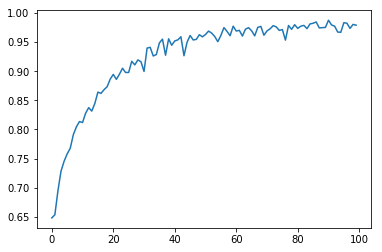

In [24]:
plt.plot(results.history['acc'])

In [25]:
train_image_gen.class_indices

{'neem': 0, 'tulsi': 1}

In [33]:
 model.save('NeemTulsi.h5')